In [4]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D

Рекурентна нейронна мережа RNN

In [5]:
# Встановлення гіперпараметрів:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 256
embedding_dim = 32
units = 32

#Завантаження даних:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

#Передпроцесинг послідовних даних:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

Побудова моделы RNN

In [6]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(units=units, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

#Компіляція моделі

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

c:\Python\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
#Навчання моделі
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - acc: 0.5474 - loss: 0.6879 - val_acc: 0.7347 - val_loss: 0.5835
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - acc: 0.7272 - loss: 0.5604 - val_acc: 0.8045 - val_loss: 0.4490
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - acc: 0.8191 - loss: 0.4232 - val_acc: 0.8352 - val_loss: 0.3792
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - acc: 0.8473 - loss: 0.3585 - val_acc: 0.8540 - val_loss: 0.3750
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - acc: 0.8801 - loss: 0.3003 - val_acc: 0.7743 - val_loss: 0.4808
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - acc: 0.8830 - loss: 0.2910 - val_acc: 0.8121 - val_loss: 0.4099
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - acc: 0.9051 - loss: 0.2437 - val_acc: 0.8456 - val_loss: 0.3926
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - acc: 0.9261 - loss: 0.2038 - val_acc: 0.8541 - val_loss: 0.4155
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - acc: 0.9248

Візуалізація

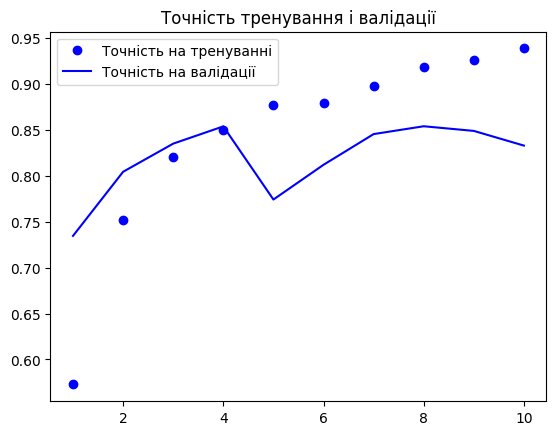

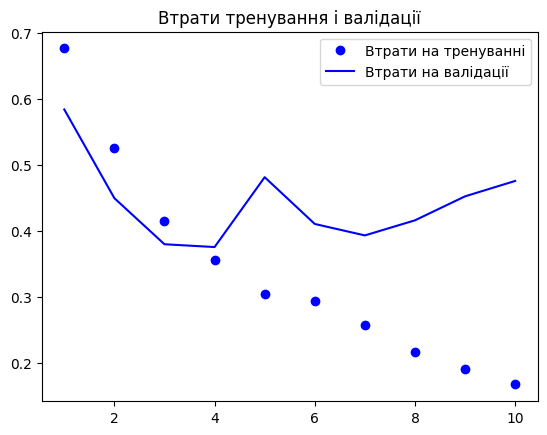

In [8]:
def visualisation(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
    plt.title('Точність тренування і валідації')  
    plt.legend()  

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  
    plt.title('Втрати тренування і валідації')  
    plt.legend()  

    plt.show()  

visualisation(history)

Використання моделі

In [9]:
def prediction(model):
    predictions = model.predict(input_test)

    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

prediction(model)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8260 - loss: 0.4866
Test Loss: 0.47637155652046204
Test Accuracy: 0.8278800249099731


Побудова моделі LSTM

In [10]:
from keras.layers import LSTM

model2 = Sequential()

model2.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model2.add(SpatialDropout1D(0.2))
model2.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
model2.add(Dense(1, activation='sigmoid'))

#Компіляція і тренування моделі
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 414ms/step - acc: 0.5221 - loss: 0.6914 - val_acc: 0.6485 - val_loss: 0.6627
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 407ms/step - acc: 0.6917 - loss: 0.6157 - val_acc: 0.7536 - val_loss: 0.5297
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 407ms/step - acc: 0.7806 - loss: 0.4933 - val_acc: 0.7993 - val_loss: 0.4414
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 412ms/step - acc: 0.8200 - loss: 0.4185 - val_acc: 0.7976 - val_loss: 0.4369
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 414ms/step - acc: 0.8406 - loss: 0.3848 - val_acc: 0.8180 - val_loss: 0.4065
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 414ms/step - acc: 0.8570 - loss: 0.3421 - val_acc: 0.8180 - val_loss: 0.4074
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 425ms/step - acc: 0.8702 - loss: 0.3198 - val_acc: 0.8216 - val_loss: 0.4014
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 417ms/step - acc: 0.8699 - loss: 0.3216 - val_acc: 0.8315 - val_loss: 0.3926
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 29s 420ms/

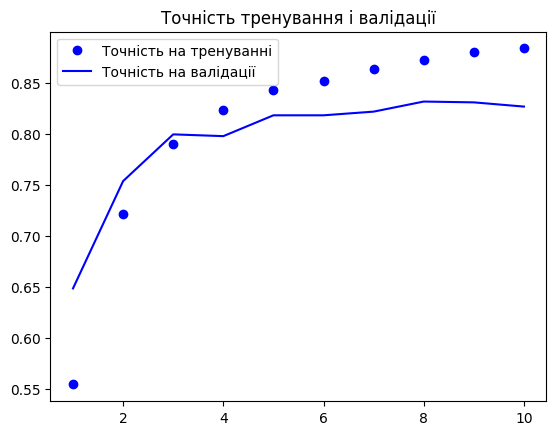

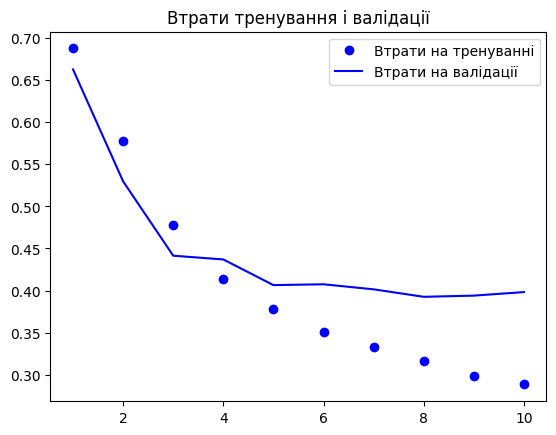

In [11]:
history2 = model2.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history2)

In [12]:
#Прогнозування з використанням навченої моделі
prediction(model2)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - acc: 0.8271 - loss: 0.3950
Test Loss: 0.3868553638458252
Test Accuracy: 0.8317199945449829


Побудова моделі BRNN

In [13]:
from keras.layers import Bidirectional

model3 = Sequential()

model3.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(LSTM(32, dropout=0.2)))
model3.add(Dense(1, activation='sigmoid'))

In [14]:
#Компіляція і тренування моделі
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.5186 - loss: 0.6920 - val_acc: 0.6793 - val_loss: 0.6321
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - acc: 0.6937 - loss: 0.5984 - val_acc: 0.7216 - val_loss: 0.5786
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - acc: 0.7859 - loss: 0.4729 - val_acc: 0.7965 - val_loss: 0.4676
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - acc: 0.8344 - loss: 0.3944 - val_acc: 0.6839 - val_loss: 0.6465
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 0.8440 - loss: 0.3658 - val_acc: 0.8619 - val_loss: 0.3300
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.8570 - loss: 0.3434 - val_acc: 0.8648 - val_loss: 0.3259
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.8740 - loss: 0.3114 - val_acc: 0.8567 - val_loss: 0.3950
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - acc: 0.8916 - loss: 0.2787 - val_acc: 0.8593 - val_loss: 0.3705
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - acc: 0.8913 - loss: 

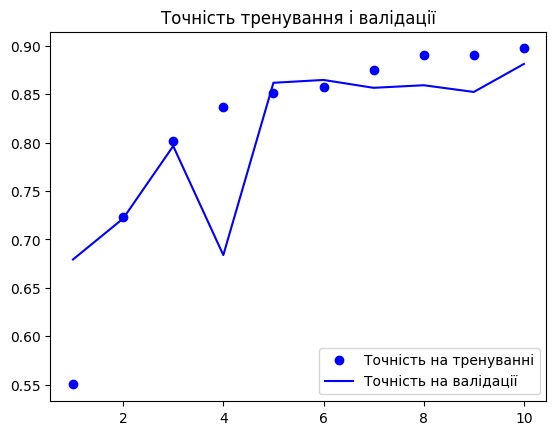

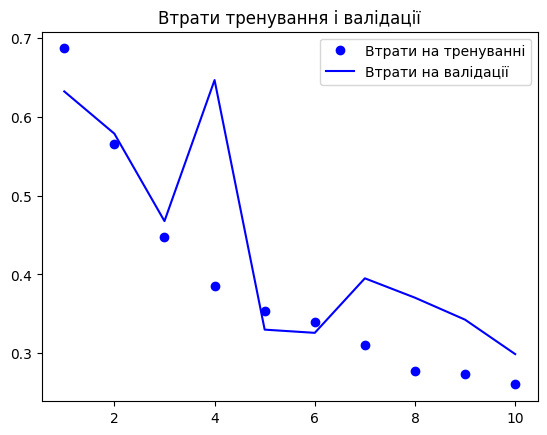

In [15]:
history3 = model3.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history3)

In [16]:
#Прогнозування з використанням навченої моделі

prediction(model3)

782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - acc: 0.8758 - loss: 0.3071
Test Loss: 0.30287471413612366
Test Accuracy: 0.8783199787139893


Побудова моделі DRNN

In [17]:
model4 = Sequential()

model4.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model4.add(SpatialDropout1D(0.2))

model4.add(Bidirectional(LSTM(32, dropout=0.2, return_sequences=True)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))

model4.add(Dense(1, activation='sigmoid'))

In [18]:
#Компіляція і тренування моделі

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - acc: 0.5128 - loss: 0.6917 - val_acc: 0.6597 - val_loss: 0.6201
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 335s 5s/step - acc: 0.7069 - loss: 0.5739 - val_acc: 0.7943 - val_loss: 0.4669
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 345s 5s/step - acc: 0.8145 - loss: 0.4256 - val_acc: 0.8385 - val_loss: 0.3784
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 353s 5s/step - acc: 0.8458 - loss: 0.3768 - val_acc: 0.8647 - val_loss: 0.3314
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 368s 5s/step - acc: 0.8500 - loss: 0.3564 - val_acc: 0.8705 - val_loss: 0.3181
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 366s 5s/step - acc: 0.8776 - loss: 0.3056 - val_acc: 0.8651 - val_loss: 0.3277
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 370s 5s/step - acc: 0.8822 - loss: 0.2942 - val_acc: 0.8545 - val_loss: 0.3434
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 370s 5s/step - acc: 0.8962 - loss: 0.2675 - val_acc: 0.8647 - val_loss: 0.3208
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 372s 5s/step - acc: 0.9020

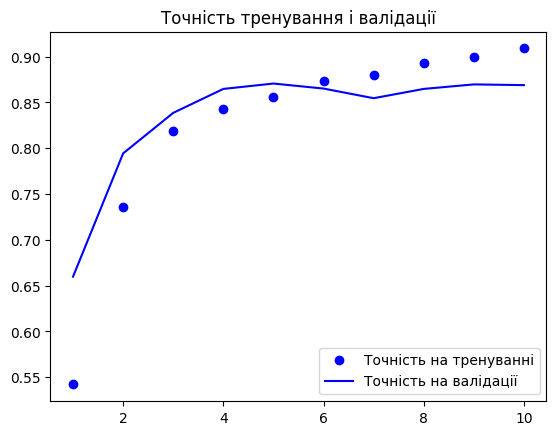

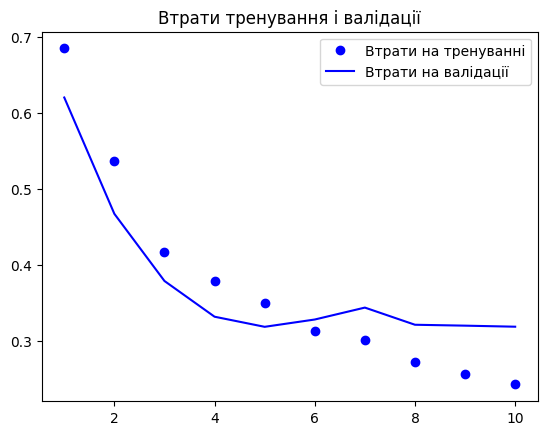

In [19]:
history4 = model4.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3)

visualisation(history4)

In [20]:
#Прогнозування з використанням навченої моделі
prediction(model4)

782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - acc: 0.8656 - loss: 0.3200
Test Loss: 0.31695470213890076
Test Accuracy: 0.8668400049209595


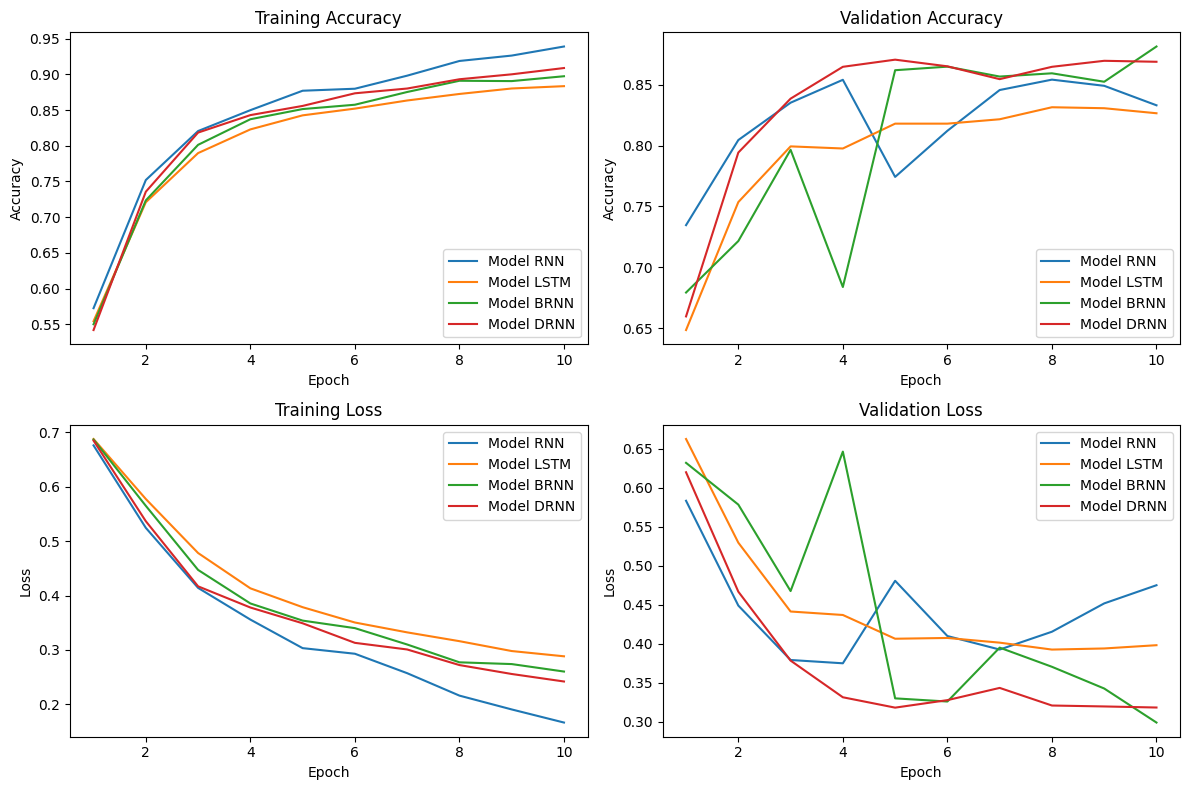

In [21]:
epochs = range(1, len(history.history['acc']) + 1)
epochs2 = range(1, len(history2.history['acc']) + 1)
epochs3 = range(1, len(history3.history['acc']) + 1)
epochs4 = range(1, len(history4.history['acc']) + 1)

# Створення сітки графіків 2x2
plt.figure(figsize=(12, 8))

# Графік 1: Точність на тренувальних данних
plt.subplot(2, 2, 1)
plt.plot(epochs, history.history['acc'], label='Model RNN')
plt.plot(epochs2, history2.history['acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['acc'], label='Model DRNN')

plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 2: Точність на валідаційних данних
plt.subplot(2, 2, 2)
plt.plot(epochs, history.history['val_acc'], label='Model RNN')
plt.plot(epochs2, history2.history['val_acc'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_acc'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_acc'], label='Model DRNN')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Графік 3: Втрати на тренувальних данних
plt.subplot(2, 2, 3)
plt.plot(epochs, history.history['loss'], label='Model RNN')
plt.plot(epochs2, history2.history['loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['loss'], label='Model DRNN')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Графік 4: Втрати на валідаційних данних
plt.subplot(2, 2, 4)
plt.plot(epochs, history.history['val_loss'], label='Model RNN')
plt.plot(epochs2, history2.history['val_loss'], label='Model LSTM')
plt.plot(epochs3, history3.history['val_loss'], label='Model BRNN')
plt.plot(epochs4, history4.history['val_loss'], label='Model DRNN')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Висновки:


Ми побудували 4 моделі, показники яких на тестових даних:

RNN: 
Test Loss - 0.47637155652046204
Test Accuracy - 0.8278800249099731

LSTM: 
Test Loss - 0.3868553638458252
Test Accuracy - 0.8317199945449829

BRNN: 
Test Loss - 0.30287471413612366
Test Accuracy - 0.8783199787139893

DRNN:
Test Loss - 0.31695470213890076
Test Accuracy - 0.8668400049209595

Кожна наступна модель на тестових даних показала кращу точність, окрім глибокої RNN. Треба зазначити, що кожна наступна модель тренувалася довше за попередні. Найдовше, відповідно, навчалася остання модель - DRNN, при цьому не давши покращення точності передбачення. Найстабільнішою на валідаційних даних виявилася модель LSTM. Для неї оптимальною була б кількість епох 9.